<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_930/1018949486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


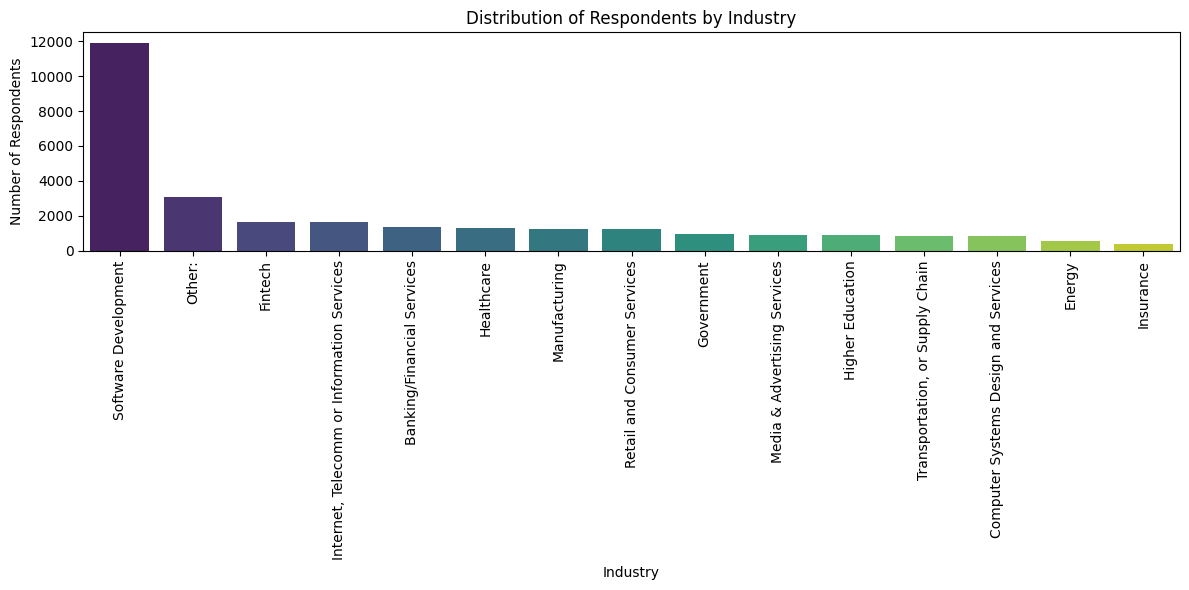

In [3]:
# Step 2: Plot the Distribution of Industry

# Check if the 'Industry' column exists
if 'Industry' in df.columns:
    
    # Count the number of respondents in each industry
    industry_counts = df['Industry'].value_counts().sort_values(ascending=False)
    
    # Set figure size
    plt.figure(figsize=(12,6))
    
    # Plot bar chart
    sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=90)
    
    # Add labels and title
    plt.xlabel("Industry")
    plt.ylabel("Number of Respondents")
    plt.title("Distribution of Respondents by Industry")
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'Industry' not found in the dataset.")


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
# Step 3: Identify High Compensation Outliers

# Check if the 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' in df.columns:
    
    # Calculate basic statistics
    mean_comp = df['ConvertedCompYearly'].mean(skipna=True)
    median_comp = df['ConvertedCompYearly'].median(skipna=True)
    std_comp = df['ConvertedCompYearly'].std(skipna=True)
    
    print(f"Mean Compensation: ${mean_comp:,.2f}")
    print(f"Median Compensation: ${median_comp:,.2f}")
    print(f"Standard Deviation: ${std_comp:,.2f}")
    
    # Define threshold for high compensation (3 standard deviations above mean)
    high_threshold = mean_comp + 3 * std_comp
    
    # Identify high compensation outliers
    high_comp_outliers = df[df['ConvertedCompYearly'] > high_threshold]
    
    print(f"\nNumber of high compensation outliers: {len(high_comp_outliers)}")
    print("Sample of high compensation outliers:")
    display(high_comp_outliers[['ConvertedCompYearly', 'Employment', 'EdLevel']].head())
    
else:
    print("Column 'ConvertedCompYearly' not found in the dataset.")


Mean Compensation: $86,155.29
Median Compensation: $65,000.00
Standard Deviation: $186,756.97

Number of high compensation outliers: 89
Sample of high compensation outliers:


,ConvertedCompYearly,Employment,EdLevel
529,650000.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
828,1000000.0,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
1932,945000.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2171,750000.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2187,2000000.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers in ConvertedCompYearly: 978


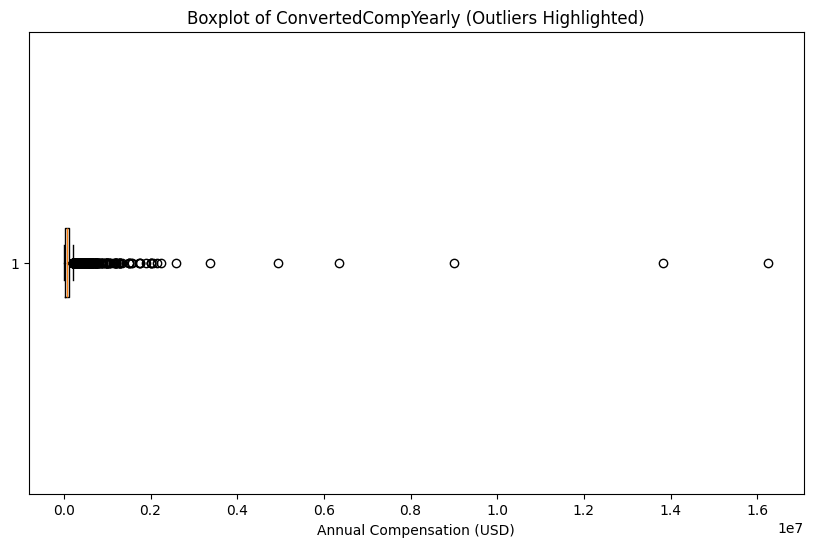

In [5]:
# Step 4: Detect Outliers in Compensation using IQR

# Ensure the column exists
if 'ConvertedCompYearly' in df.columns:

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    
    # Compute IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
    
    print(f"Number of outliers in ConvertedCompYearly: {len(outliers)}")
    
    # Visualize using a box plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=False)
    plt.title("Boxplot of ConvertedCompYearly (Outliers Highlighted)")
    plt.xlabel("Annual Compensation (USD)")
    plt.show()

else:
    print("Column 'ConvertedCompYearly' not found in the dataset.")




<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
# Step 5: Remove Outliers and Create a New DataFrame

# Ensure the column exists
if 'ConvertedCompYearly' in df.columns:
    
    # Reuse the IQR calculation from Step 4
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
    
    # Validate the size of the new DataFrame
    print(f"Original DataFrame shape: {df.shape}")
    print(f"DataFrame after removing outliers: {df_no_outliers.shape}")
    
else:
    print("Column 'ConvertedCompYearly' not found in the dataset.")


Original DataFrame shape: (65437, 114)
DataFrame after removing outliers: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Robust function to convert Age to numeric
def age_to_numeric(age):
    if pd.isnull(age):
        return np.nan
    age = str(age).strip()  # ensure string
    # Case: "Less than 18" or "18 years old"
    if "Less than" in age:
        return 17
    if "More than" in age:
        try:
            return int(''.join(filter(str.isdigit, age))) + 1
        except:
            return np.nan
    # Case: ranges like "25-34"
    if '-' in age:
        parts = age.split('-')
        try:
            start = int(''.join(filter(str.isdigit, parts[0])))
            end = int(''.join(filter(str.isdigit, parts[1])))
            return (start + end) / 2
        except:
            return np.nan
    # Case: single number with text, e.g., "44 years old"
    try:
        return int(''.join(filter(str.isdigit, age)))
    except:
        return np.nan

# Apply function
df['Age_numeric'] = df['Age'].apply(age_to_numeric)

# Check the results
df['Age_numeric'].head()


0    18.0
1    39.5
2    49.5
3    21.0
4    21.0
Name: Age_numeric, dtype: float64

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
